## Brownian Bridge simulation
Pathsimulation via Brownian Bridge, path refinement with parameters $T$ denoting the final time, $L$ being the number of refinements, $N_0$ the number of grid points on the first level.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1     # final time
L = 8
N0 = 10

# Initialization
N = N0 * 2 ** L
EMX = np.zeros((L + 1, N + 1))
x0 = 0
h = T / N
B = np.concatenate(([np.zeros((1, 1))], np.sqrt(T / N0) * np.cumsum(np.random.randn(N0, 1))), axis=0)
EMX[0, ::2 ** L] = B.flatten()
t = T * np.arange(N + 1) / N

# Plotting of the crude path
plt.subplot(3, 3, 1)
plt.plot(T * np.arange(N0 + 1) / N0, B)
plt.xlabel('time')
plt.ylabel('value')

# Brownian bridge simulations
for i in range(1, L + 1):
    p = 2 ** (L - i + 1)
    EMX[i, :] = EMX[i - 1, :]
    h = T / (N0 * 2 ** (i - 1))
    len = N // p // 2
    EMX[i, p + 1:N + 2 - p:2 * p] = 0.5 * (EMX[i, 1:N + 2 - 2 * p:2 * p] + EMX[i, 2 * p + 1:N + 2 - 2 * p:2 * p]) + np.sqrt(h / 2) * np.random.randn(len)
    plt.subplot(3, 3, i + 1)
    plt.plot(t[::p], EMX[i, ::p])
    plt.xlabel('time')
    plt.ylabel('value')
plt.show()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 1 dimension(s)

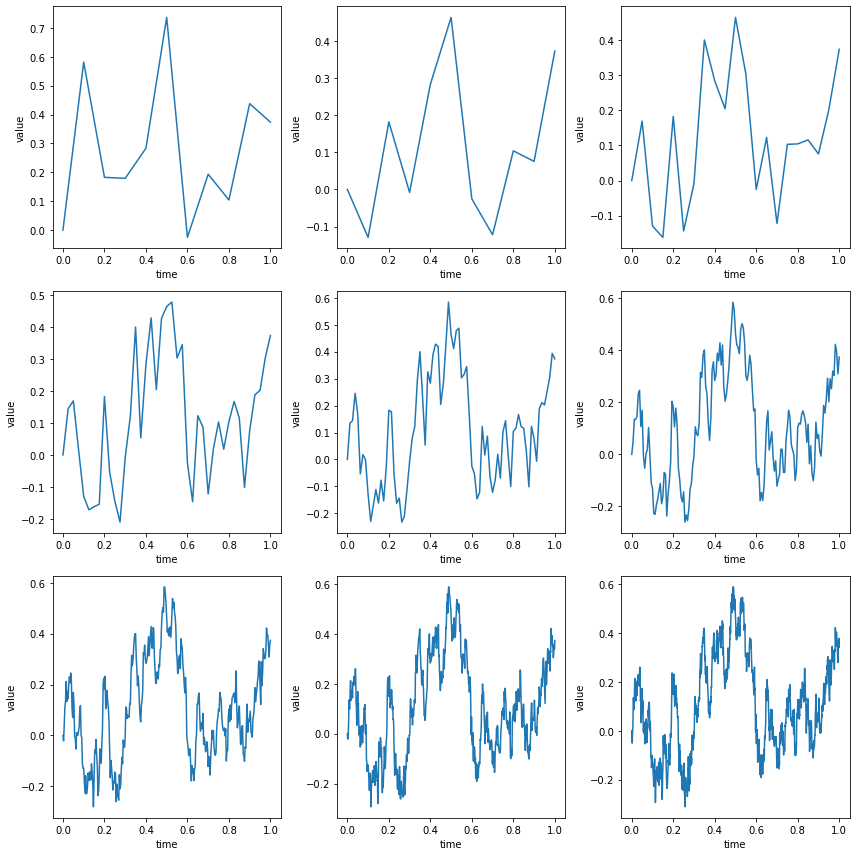

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1  # final time
L = 8
N0 = 10

# Initialize
N = N0 * 2 ** L
EMX = np.zeros((L + 1, N + 1))
x0 = 0
h = T / N
B = np.concatenate(([0], np.sqrt(T / N0) * np.cumsum(np.random.randn(N0))))

# Path of Brownian motion at crudest level
EMX[0, ::2 ** L] = B
t = T * np.arange(N + 1) / N

# Plot the first path
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes[0, 0].plot(T * np.arange(N0 + 1) / N0, B)
axes[0, 0].set(xlabel='time', ylabel='value')

# Brownian bridge simulations
for i in range(1, L + 1):
    p = 2 ** (L - i + 1)
    EMX[i] = EMX[i - 1]
    h = T / (N0 * 2 ** (i - 1))
    len_ = N // (p * 2)
    EMX[i, p: N + 1 - p: 2 * p] = 0.5 * (EMX[i, 0:N + 1 - 2 * p: 2 * p] + EMX[i, 2 * p: N + 1: 2 * p]) + np.sqrt(h / 2) * np.random.randn(len_)

    # Plot the refined path
    ax = axes[i // 3, i % 3]
    ax.plot(t[0:N + 1:p], EMX[i, 0:N + 1:p])
    ax.set(xlabel='time', ylabel='value')

plt.tight_layout()
plt.show()
